In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE


In [3]:
df=pd.read_csv("C:\\Users\\racha\\Downloads\\healthcare-dataset-stroke-data.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
imputer = SimpleImputer(strategy="median")
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [6]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [7]:
df = remove_outliers_iqr(df, 'bmi')
df = remove_outliers_iqr(df, 'avg_glucose_level')


In [8]:
label_cols = ['gender', 'ever_married']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [9]:
df = pd.get_dummies(df, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)



In [10]:
print("\nDataset After Encoding:\n", df.head())


Dataset After Encoding:
       id  gender   age  hypertension  heart_disease  ever_married  \
2  31112       1  80.0             0              1             1   
6  53882       1  74.0             1              1             1   
7  10434       0  69.0             0              0             0   
8  27419       0  59.0             0              0             1   
9  60491       0  78.0             0              0             1   

   avg_glucose_level   bmi  stroke  work_type_Never_worked  work_type_Private  \
2             105.92  32.5       1                   False               True   
6              70.09  27.4       1                   False               True   
7              94.39  22.8       1                   False               True   
8              76.15  28.1       1                   False               True   
9              58.57  24.2       1                   False               True   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \


In [11]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [12]:
print("\nClass Distribution Before SMOTE:\n", y.value_counts())


Class Distribution Before SMOTE:
 stroke
0    4225
1     165
Name: count, dtype: int64


In [13]:
if y.value_counts()[1] / y.value_counts()[0] < 0.3:  # If imbalance exists, apply SMOTE
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)
    print("\nClass Distribution After SMOTE:\n", y.value_counts())


Class Distribution After SMOTE:
 stroke
1    4225
0    4225
Name: count, dtype: int64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)



Training Set Shape: (6760, 16)
Testing Set Shape: (1690, 16)


In [16]:
scaler = StandardScaler()
cols_to_scale = ['avg_glucose_level', 'bmi'] 

In [17]:
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [18]:
print("\nFeature Scaling Applied to:", cols_to_scale)
print("\nFinal Processed Dataset Ready for Model Training!")


Feature Scaling Applied to: ['avg_glucose_level', 'bmi']

Final Processed Dataset Ready for Model Training!


In [19]:
X_train, X_test, y_train, y_test  

(         id  gender        age  hypertension  heart_disease  ever_married  \
 6268  41602       1  55.929334             0              0             1   
 236   10449       0  24.000000             0              0             1   
 1969  12557       0  21.000000             0              0             0   
 5442  16536       1  70.361475             0              0             0   
 4823  12341       0  61.570284             0              0             1   
 ...     ...     ...        ...           ...            ...           ...   
 4029  31113       0   1.160000             0              0             0   
 4633  23868       0  70.943427             0              0             1   
 4128  69723       1  15.000000             0              0             0   
 7216  67606       0  65.595690             0              0             1   
 837    6793       0  55.000000             0              0             1   
 
       avg_glucose_level       bmi  work_type_Never_worked  wo

In [20]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [21]:
pip install catboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

In [24]:
X_train, X_test, y_train, y_test 

(         id  gender        age  hypertension  heart_disease  ever_married  \
 6268  41602       1  55.929334             0              0             1   
 236   10449       0  24.000000             0              0             1   
 1969  12557       0  21.000000             0              0             0   
 5442  16536       1  70.361475             0              0             0   
 4823  12341       0  61.570284             0              0             1   
 ...     ...     ...        ...           ...            ...           ...   
 4029  31113       0   1.160000             0              0             0   
 4633  23868       0  70.943427             0              0             1   
 4128  69723       1  15.000000             0              0             0   
 7216  67606       0  65.595690             0              0             1   
 837    6793       0  55.000000             0              0             1   
 
       avg_glucose_level       bmi  work_type_Never_worked  wo

In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=False, random_state=42)
}




 Training & Evaluating: Logistic Regression
 Accuracy: 0.8071
 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       845
           1       0.78      0.85      0.81       845

    accuracy                           0.81      1690
   macro avg       0.81      0.81      0.81      1690
weighted avg       0.81      0.81      0.81      1690



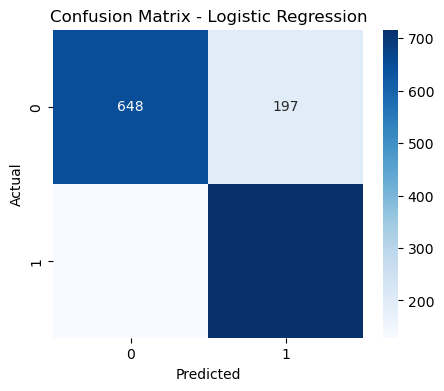

Cross-Validation Accuracy (5-fold): 0.7493 ± 0.0708

 Training & Evaluating: Decision Tree
 Accuracy: 0.9290
 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       845
           1       0.91      0.95      0.93       845

    accuracy                           0.93      1690
   macro avg       0.93      0.93      0.93      1690
weighted avg       0.93      0.93      0.93      1690



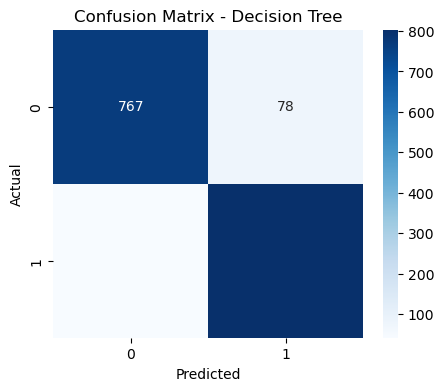

Cross-Validation Accuracy (5-fold): 0.9191 ± 0.0120

 Training & Evaluating: Random Forest
 Accuracy: 0.9604
 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       845
           1       0.96      0.96      0.96       845

    accuracy                           0.96      1690
   macro avg       0.96      0.96      0.96      1690
weighted avg       0.96      0.96      0.96      1690



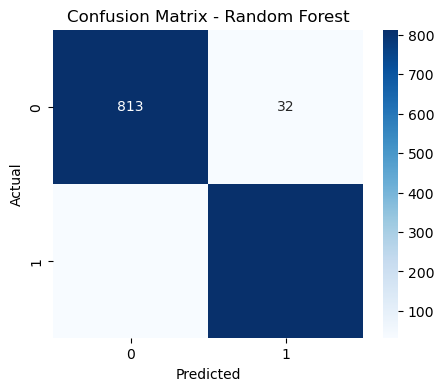

Cross-Validation Accuracy (5-fold): 0.9614 ± 0.0056

 Training & Evaluating: KNN
 Accuracy: 0.7538
 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.74       845
           1       0.73      0.81      0.77       845

    accuracy                           0.75      1690
   macro avg       0.76      0.75      0.75      1690
weighted avg       0.76      0.75      0.75      1690



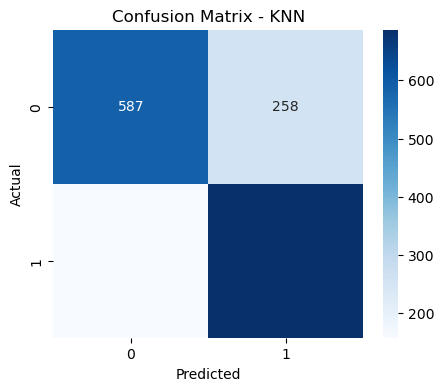

Cross-Validation Accuracy (5-fold): 0.7309 ± 0.0061

 Training & Evaluating: SVM
 Accuracy: 0.5231
 Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.83      0.63       845
           1       0.56      0.22      0.31       845

    accuracy                           0.52      1690
   macro avg       0.54      0.52      0.47      1690
weighted avg       0.54      0.52      0.47      1690



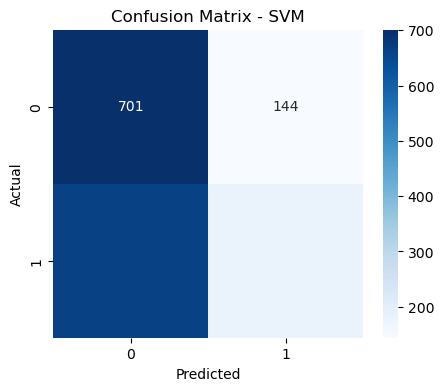

Cross-Validation Accuracy (5-fold): 0.5251 ± 0.0074

 Training & Evaluating: Naive Bayes
 Accuracy: 0.7970
 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       845
           1       0.74      0.92      0.82       845

    accuracy                           0.80      1690
   macro avg       0.82      0.80      0.79      1690
weighted avg       0.82      0.80      0.79      1690



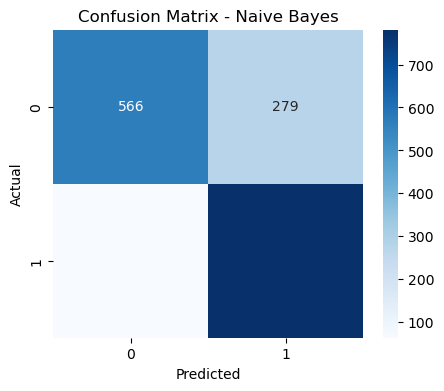

Cross-Validation Accuracy (5-fold): 0.8092 ± 0.0136

 Training & Evaluating: Gradient Boosting
 Accuracy: 0.9107
 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       845
           1       0.90      0.92      0.91       845

    accuracy                           0.91      1690
   macro avg       0.91      0.91      0.91      1690
weighted avg       0.91      0.91      0.91      1690



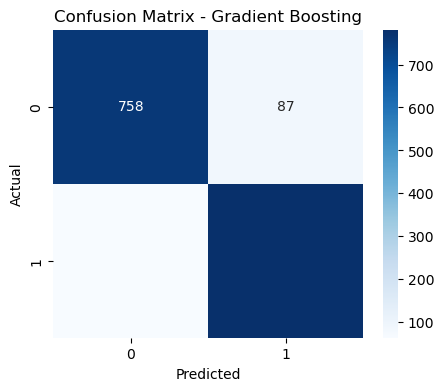

Cross-Validation Accuracy (5-fold): 0.9311 ± 0.0051

 Training & Evaluating: AdaBoost
 Accuracy: 0.8899
 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       845
           1       0.87      0.92      0.89       845

    accuracy                           0.89      1690
   macro avg       0.89      0.89      0.89      1690
weighted avg       0.89      0.89      0.89      1690



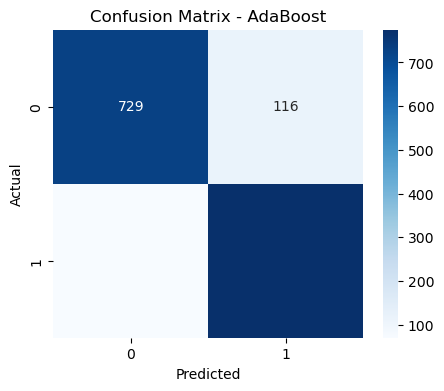

Cross-Validation Accuracy (5-fold): 0.9037 ± 0.0092

 Training & Evaluating: XGBoost
 Accuracy: 0.9497
 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       845
           1       0.94      0.96      0.95       845

    accuracy                           0.95      1690
   macro avg       0.95      0.95      0.95      1690
weighted avg       0.95      0.95      0.95      1690



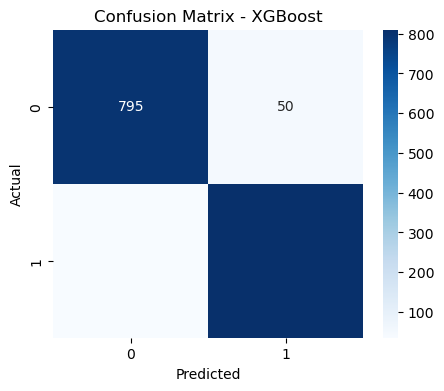

Cross-Validation Accuracy (5-fold): 0.9590 ± 0.0043

 Training & Evaluating: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3380, number of negative: 3380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 6760, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
 Accuracy: 0.9604
 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       845
           1       0.96      0.97      0.96       845

    accuracy                           0.96      1690
   macro avg       0.96      0.96      0.96      1690
weighted avg       

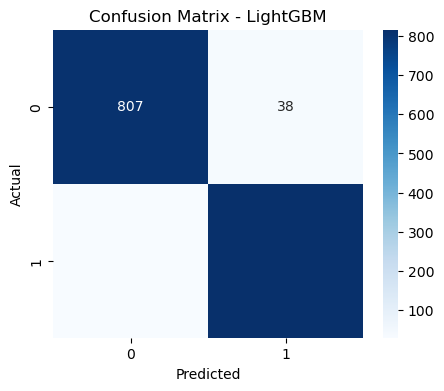

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2704, number of negative: 2704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 5408, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2704, number of negative: 2704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] 

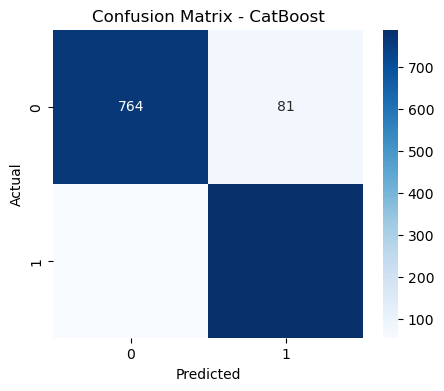

Cross-Validation Accuracy (5-fold): 0.9317 ± 0.0070


In [26]:
for name, model in models.items():
    print(f"\n Training & Evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc:.4f}")
    print(" Classification Report:\n", classification_report(y_test, y_pred))
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-Validation Accuracy (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

In [27]:
!pip install lime


Defaulting to user installation because normal site-packages is not writeable


In [32]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

In [33]:
lightgbm_model = models["LightGBM"]

In [34]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['No Stroke', 'Stroke'],
    mode='classification'
)

In [35]:
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.values[10],
    predict_fn=lightgbm_model.predict_proba,
    num_features=6
)

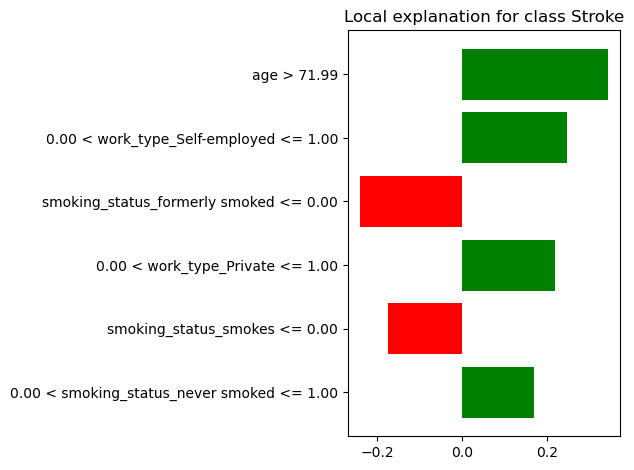

In [36]:
lime_exp.as_pyplot_figure()
plt.tight_layout()
lime_exp.show_in_notebook(show_table=True)

In [37]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [38]:

import shap

In [53]:
import shap
from matplotlib import pyplot as plt


In [55]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)


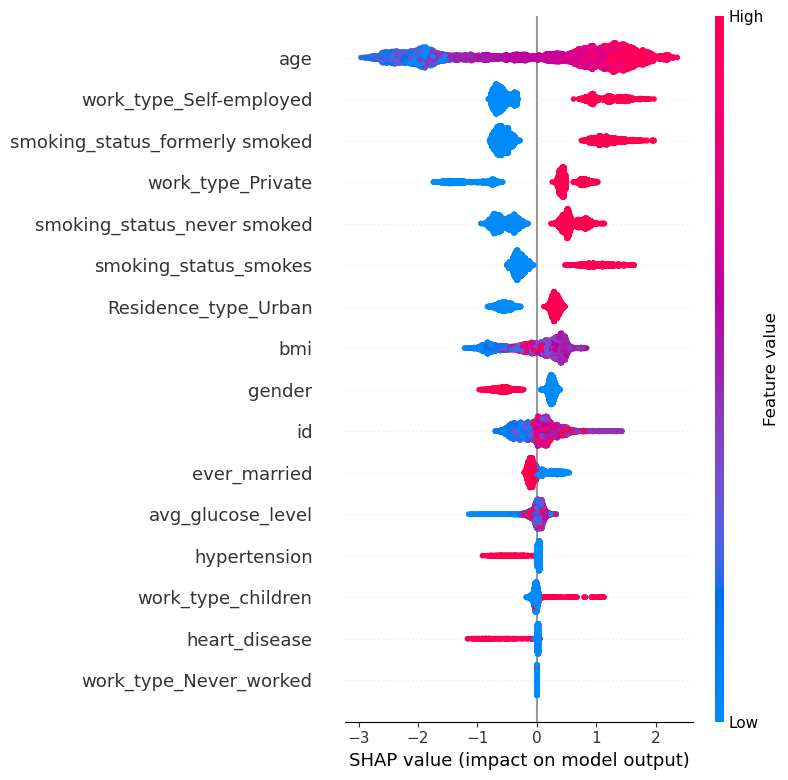

In [58]:
shap.summary_plot(shap_values, X_train)


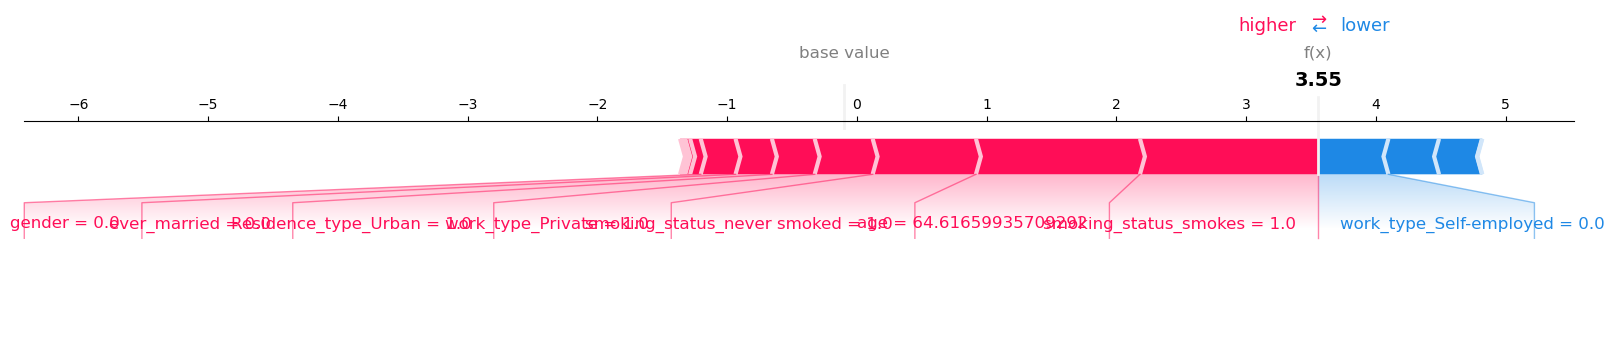

In [60]:
shap.force_plot(
    explainer.expected_value,        # no [1] here
    shap_values[10],                 # SHAP values for instance 10
    X_train.iloc[10],                # feature values for instance 10
    matplotlib=True
)


In [62]:
plt.tight_layout()


<Figure size 640x480 with 0 Axes>